# Regression
**Author**: Andrea Cass

## 1. About this notebook
The purpose of this notebook is to run a logistic regression using several variables:

* **Dependent variable**: sentiment (positive/negative)

* **Main explanatory variable**: inflow (Syrian/Ukrainian)

* **Control**: foreign population size

* **Control**: economic situation

Steps:
1. Remaining data preparations
2. Creation of control variables
3. Regression

Several control variable options were created, and, after checking for multicollinearity, one indicating economic situation and one indicating foreign population size was chosen.

## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
from pathlib import Path
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

## 3. Working directory & file paths

In [2]:
# find current working directory

os.getcwd()

'/Users/andycass/Jupyterlab_main-folder/THESIS/limited collection/revised'

In [3]:
# changing current working directory

os.chdir('/Users/andycass/Desktop/Thesis_data-and-code')

In [4]:
# naming the current working directory

cwd = Path.cwd()

In [5]:
# naming the CASS_thesis folder

CASS_thesis = cwd / 'CASS_thesis'

In [6]:
# double-checking the CASS_thesis location

CASS_thesis

PosixPath('/Users/andycass/Desktop/Thesis_data-and-code/CASS_thesis')

## 4. Data prep - dropping all cases before inflow
Before adding controls, I need to drop all cases BEFORE the inflow (because my regression only focuses on during inflow--i.e., from the center time-point onwards)

In [7]:
df = pd.read_csv(CASS_thesis / '05_Explored-and-vizualized_limited_merged_binary.csv', index_col=[0])

In [8]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.541075,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,0.731547,0.247820,0.020633,NEGATIVE,-1,2016-04-20 13:56:27,False,False,False,True
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,0.603958,0.375516,0.020525,NEGATIVE,-1,2016-04-20 13:45:34,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21522,"@RGrahamPE1 @maxrushden Agree, when you look a...",4.155022e+07,2021-06-30 10:41:16+00:00,en,c589d9d6ed38927c,0.0,0.0,0.0,0.0,0.0,...,0.843558,0.124553,0.031888,NEGATIVE,-1,2021-06-30 10:41:16,False,True,True,False
21523,So proud of our Ukrainian team!!! But I don’t ...,1.388233e+08,2021-06-29 21:50:55+00:00,en,cc5401f65b0ddc7b,0.0,0.0,2.0,0.0,0.0,...,0.383906,0.151763,0.464331,POSITIVE,1,2021-06-29 21:50:55,False,True,True,False
21524,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True,False
21525,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True,False


In [9]:
# dropping all cases before inflow
df = df.drop(df[df.before_inflow == True].index)

In [10]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.541075,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,0.731547,0.247820,0.020633,NEGATIVE,-1,2016-04-20 13:56:27,False,False,False,True
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,0.603958,0.375516,0.020525,NEGATIVE,-1,2016-04-20 13:45:34,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21019,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,0.714633,0.261862,0.023505,NEGATIVE,-1,2022-02-24 07:11:54,False,False,False,True
21020,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,0.792305,0.191151,0.016544,NEGATIVE,-1,2022-02-24 07:10:12,False,False,False,True
21021,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,0.450480,0.347824,0.201696,NEGATIVE,-1,2022-02-24 06:05:46,False,False,False,True
21022,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,0.049148,0.287370,0.663483,POSITIVE,1,2022-02-24 05:40:50,False,False,False,True


In [11]:
# resetting index

df = df.reset_index(drop=True)

In [12]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.541075,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,0.731547,0.247820,0.020633,NEGATIVE,-1,2016-04-20 13:56:27,False,False,False,True
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,0.603958,0.375516,0.020525,NEGATIVE,-1,2016-04-20 13:45:34,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,0.714633,0.261862,0.023505,NEGATIVE,-1,2022-02-24 07:11:54,False,False,False,True
18261,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,0.792305,0.191151,0.016544,NEGATIVE,-1,2022-02-24 07:10:12,False,False,False,True
18262,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,0.450480,0.347824,0.201696,NEGATIVE,-1,2022-02-24 06:05:46,False,False,False,True
18263,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,0.049148,0.287370,0.663483,POSITIVE,1,2022-02-24 05:40:50,False,False,False,True


## 5. Economic situation
### 5.1. Unemployment
In this section, I add unemployment data to the existing data frame. Specifically, I will assign all observations published in each year a corresponding yearly unemployment rate, "unemp"

Syrian inflow:
* 2014: **0.067** (6.7%)
* 2015: **0.064** (6.4%)
* 2016: **0.061** (6.1%)

Ukrainian inflow:
* 2021: **0.057** (5.7%)
* 2022: **0.054** (5.4%)

I will also create a variable indicating monthly unemployment rate, "month_unemp".

2015:
* 2015-08: **0.041** (4.1%)
* 2015-09: **0.040** (4.0%)
* 2015-10 **0.041** (4.1%)
* 2015-11 **0.043** (4.3%)
* 2015-12 **0.042** (4.2%)

2016:
* 2016-01: **0.041** (4.1%)
* 2016-02: **0.044** (4.4%)
* 2016-03 **0.043** (4.3%)
* 2016-04: **0.040** (4.0%)

2022:
* 2022-02: **0.032** (3.2%)
* 2022-03: **0.030** (3.0%)
* 2022-04: **0.032** (3.2%)
* 2022-05: **0.029** (2.9%)
* 2022-06: **0.029** (2.9%)
* 2022-07: **0.034** (3.4%)
* 2022-08: **0.031** (3.1%)
* 2022-09: **0.029** (2.9%)
* 2022-10: **0.029** (2.9%)

In [14]:
# creating "unemp"

df['unemp'] = np.where(df['year'] == 2014, 0.067, 
                      np.where(df['year'] == 2015, 0.064, 
                               np.where(df['year'] == 2016, 0.061,
                                        np.where(df['year'] == 2021, 0.057,
                                                 np.where(df['year'] == 2022, 0.054, np.nan)))))


In [15]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,unemp
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0.061
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,0.061
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True,0.061
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,0.247820,0.020633,NEGATIVE,-1,2016-04-20 13:56:27,False,False,False,True,0.061
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,0.375516,0.020525,NEGATIVE,-1,2016-04-20 13:45:34,False,False,False,True,0.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,0.261862,0.023505,NEGATIVE,-1,2022-02-24 07:11:54,False,False,False,True,0.054
18261,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,0.191151,0.016544,NEGATIVE,-1,2022-02-24 07:10:12,False,False,False,True,0.054
18262,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,0.347824,0.201696,NEGATIVE,-1,2022-02-24 06:05:46,False,False,False,True,0.054
18263,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,0.287370,0.663483,POSITIVE,1,2022-02-24 05:40:50,False,False,False,True,0.054


In [16]:
# creating "month_unemp"

month_unemp_map = {'2015-08': 0.041, '2015-09': 0.040, '2015-10': 0.041, '2015-11': 0.043, '2015-12': 0.042, '2016-01': 0.041, '2016-02': 0.044, '2016-03': 0.043, '2016-04': 0.040, '2022-02': 0.032, '2022-03': 0.030, '2022-04': 0.032, '2022-05': 0.029, '2022-06': 0.029, '2022-07': 0.034, '2022-08': 0.031, '2022-09': 0.029, '2022-10': 0.029}

df['month_unemp'] = df['year-month'].map(month_unemp_map)

In [17]:
df.month_unemp.value_counts()

0.029    3800
0.041    3056
0.040    2473
0.030    2056
0.043    1906
0.032    1613
0.044    1066
0.031     796
0.034     772
0.042     727
Name: month_unemp, dtype: int64

In [18]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,unemp,month_unemp
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0.061,0.040
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,0.061,0.040
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True,0.061,0.040
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,0.020633,NEGATIVE,-1,2016-04-20 13:56:27,False,False,False,True,0.061,0.040
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,0.020525,NEGATIVE,-1,2016-04-20 13:45:34,False,False,False,True,0.061,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,0.023505,NEGATIVE,-1,2022-02-24 07:11:54,False,False,False,True,0.054,0.032
18261,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,0.016544,NEGATIVE,-1,2022-02-24 07:10:12,False,False,False,True,0.054,0.032
18262,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,0.201696,NEGATIVE,-1,2022-02-24 06:05:46,False,False,False,True,0.054,0.032
18263,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,0.663483,POSITIVE,1,2022-02-24 05:40:50,False,False,False,True,0.054,0.032


### 5.2 GDP 
#### 5.2.1. GDP volume growth

In this section, I add GDP to the existing data frame. This data is taken from OECD Statistics on **GDP volume growth**.

* 2015: 1.24%
* 2016: 2.14%
* 2022: 1.77%

In [19]:
# creating "GDP_vol"

GDP_vol_map = {2015: 1.24, 2016: 2.14, 2022: 1.77}

df['GDP_vol'] = df['year'].map(GDP_vol_map)

In [20]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,unemp,month_unemp,GDP_vol
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0.061,0.040,2.14
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,0.061,0.040,2.14
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True,0.061,0.040,2.14
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,NEGATIVE,-1,2016-04-20 13:56:27,False,False,False,True,0.061,0.040,2.14
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,NEGATIVE,-1,2016-04-20 13:45:34,False,False,False,True,0.061,0.040,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,NEGATIVE,-1,2022-02-24 07:11:54,False,False,False,True,0.054,0.032,1.77
18261,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,NEGATIVE,-1,2022-02-24 07:10:12,False,False,False,True,0.054,0.032,1.77
18262,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,NEGATIVE,-1,2022-02-24 06:05:46,False,False,False,True,0.054,0.032,1.77
18263,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,POSITIVE,1,2022-02-24 05:40:50,False,False,False,True,0.054,0.032,1.77


#### 5.2.2. GDP volume, market prices

* 2015: 3,023,456,440,000
* 2016: 3,088,292,290,000
* 2022: 3,252,251,278,688.25

In [21]:
# creating "GDP_nom"

GDP_nom_map = {2015: 3023456440000, 2016: 3088292290000, 2022: 3252251278688.25}

df['GDP_nom'] = df['year'].map(GDP_nom_map)

#### 5.2.3. Net disposable income of households & non-profits serving households

* 2015: 1,724,533,000,000
* 2016: 1,784,884,000,000
* 2022: 2,134,895,916,416.89

In [22]:
# creating "net_disp"

net_disp_map = {2015: 1724533000000, 2016: 1784884000000, 2022: 2134895916416.89}

df['net_disp'] = df['year'].map(net_disp_map)

## 6. Foreign population size

In this section, I add several variables to the dataframe:
* foreign_arrivals: number of yearly foreign arrivals
* foreign_share: yearly foreign share of population
* change_foreign_share: change in yearly foreign share of population from previous year

In [23]:
# calculating yearly foreign arrivals by adding monthly totals

print(99093 + 112036 + 548320 + 303528 + 218366 + 167121 + 166599 + 194849 + 197346 + 190158 + 156928 + 133016)

2487360


### 6.1 Foreign arrivals

* 2015: 2,016,241
* 2016: 1,719,075
* 2022: 2,487,360

In [24]:
# creating "foreign_arrivals"

foreign_arrivals_map = {2015: 2016241, 2016: 1719075, 2022: 2487360}

df['foreign_arrivals'] = df['year'].map(foreign_arrivals_map)

### 6.2 Foreign share of population
I define inflow size, here, as foreign share of total population. Therefore, I divide yearly foreign arrivals by yearly total population. This data is retrieved from Genesis Destatis table 12411-0001 and https://www.destatis.de/EN/Press/2023/01/PE23_026_124.html

* 2015: 2,016,241 / 82,175,684 = 0.0245 --> 2.45%
* 2016: 1,719,075 / 82,521,653 = 0.0208 --> 2.08%
* 2022: 2,487,360, 84,300,000 = 0.0295 --> 2.95% 

In [25]:
# creating "foreign_share"

foreign_share_map = {2015: 2.45, 2016: 2.08, 2022: 2.95}

df['foreign_share'] = df['year'].map(foreign_share_map)

In [26]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,before_ukrainian_inflow,before_inflow,during_inflow,unemp,month_unemp,GDP_vol,GDP_nom,net_disp,foreign_arrivals,foreign_share
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,False,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,False,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,False,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,False,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,False,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,False,False,True,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95
18261,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,False,False,True,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95
18262,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,False,False,True,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95
18263,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,False,False,True,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95


### 6.3 Change in foreign share of population

I calculate change in foreign share of population by subtracting the previous year from the current year.

* 2015 (change from 2014): 0.0245 - 0.0165 = 0.008 --> 0.8%
* 2016 (change from 2015): 0.0209 - 0.0245 = -0.0037 --> -0.37%
* 2022 (change from 2021): 0.0295 - 0.0137 = 0.0158 --> 1.58%

In [27]:
# creating "change_foreign_share"

change_foreign_share_map = {2015: 0.8, 2016: -0.37, 2022: 1.58}

df['change_foreign_share'] = df['year'].map(change_foreign_share_map)

In [28]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,before_inflow,during_inflow,unemp,month_unemp,GDP_vol,GDP_nom,net_disp,foreign_arrivals,foreign_share,change_foreign_share
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,False,True,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,False,True,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
18261,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,False,True,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
18262,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,False,True,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
18263,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,False,True,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58


## 7. Selection of controls
In order to choose a control for foreing population size and a control for economic situation, multicollinearity is assessed. Additionally, inflow and CLASS (the main explanatory variable and dependent variable) are converted to dummies--the form they take in the regression.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   text                             18265 non-null  object 
 1   author_id                        18265 non-null  float64
 2   created_at                       18265 non-null  object 
 3   lang                             18265 non-null  object 
 4   geo.place_id                     18110 non-null  object 
 5   public_metrics.retweet_count     18265 non-null  float64
 6   public_metrics.reply_count       18265 non-null  float64
 7   public_metrics.like_count        18265 non-null  float64
 8   public_metrics.quote_count       18265 non-null  float64
 9   public_metrics.impression_count  18265 non-null  float64
 10  geo.coordinates.coordinates      1003 non-null   object 
 11  in_reply_to_user_id              7446 non-null   float64
 12  entities.hashtags 

In [30]:
df.inflow.value_counts()

Syrians       9228
Ukrainians    9037
Name: inflow, dtype: int64

In [31]:
# creating 'inflow' dummy variable and keeping the original 'inflow' column

df = df.assign(inflow_Ukrainians=(df['inflow'] == 'Ukrainians').astype(int),
               inflow_Syrians=(df['inflow'] == 'Syrians').astype(int))

In [32]:
df.CLASS.value_counts()

NEGATIVE    14959
POSITIVE     3306
Name: CLASS, dtype: int64

In [33]:
# creating 'CLASS' dummy variable and keeping the original 'CLASS' column

df = df.assign(CLASS_POSITIVE=(df['CLASS'] == 'POSITIVE').astype(int),
               CLASS_NEGATIVE=(df['CLASS'] == 'NEGATIVE').astype(int))

In [34]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,GDP_vol,GDP_nom,net_disp,foreign_arrivals,foreign_share,change_foreign_share,inflow_Ukrainians,inflow_Syrians,CLASS_POSITIVE,CLASS_NEGATIVE
0,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37,0,1,1,0
1,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37,0,1,0,1
2,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37,0,1,0,1
3,#Boehmi schrieb #Schmähgedicht\n#Bundesregieru...,1.599137e+08,2016-04-20 13:56:27+00:00,de,3078869807f9dd36,0.0,1.0,1.0,0.0,0.0,...,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37,0,1,0,1
4,#Bamberg: Mitglied einer syrisch-islamistische...,8.978133e+07,2016-04-20 13:45:34+00:00,de,550c9e2e561a32bd,0.0,0.0,0.0,0.0,0.0,...,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58,1,0,0,1
18261,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58,1,0,0,1
18262,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58,1,0,0,1
18263,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58,1,0,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   text                             18265 non-null  object 
 1   author_id                        18265 non-null  float64
 2   created_at                       18265 non-null  object 
 3   lang                             18265 non-null  object 
 4   geo.place_id                     18110 non-null  object 
 5   public_metrics.retweet_count     18265 non-null  float64
 6   public_metrics.reply_count       18265 non-null  float64
 7   public_metrics.like_count        18265 non-null  float64
 8   public_metrics.quote_count       18265 non-null  float64
 9   public_metrics.impression_count  18265 non-null  float64
 10  geo.coordinates.coordinates      1003 non-null   object 
 11  in_reply_to_user_id              7446 non-null   float64
 12  entities.hashtags 

### 7.1. Multicollinearity checks

In [36]:
# creating a smaller dataset with only the variables of interest

df_small = df[['CLASS_POSITIVE', 'inflow_Ukrainians', 'unemp', 'month_unemp', 'GDP_vol', 'GDP_nom', 'net_disp', 'foreign_arrivals', 'foreign_share', 'change_foreign_share']]

In [37]:
df_small

,CLASS_POSITIVE,inflow_Ukrainians,unemp,month_unemp,GDP_vol,GDP_nom,net_disp,foreign_arrivals,foreign_share,change_foreign_share
0,1,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
1,0,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
2,0,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
3,0,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
4,0,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
...,...,...,...,...,...,...,...,...,...,...
18260,0,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
18261,0,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
18262,0,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
18263,1,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58


In [38]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLASS_POSITIVE        18265 non-null  int64  
 1   inflow_Ukrainians     18265 non-null  int64  
 2   unemp                 18265 non-null  float64
 3   month_unemp           18265 non-null  float64
 4   GDP_vol               18265 non-null  float64
 5   GDP_nom               18265 non-null  float64
 6   net_disp              18265 non-null  float64
 7   foreign_arrivals      18265 non-null  int64  
 8   foreign_share         18265 non-null  float64
 9   change_foreign_share  18265 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.4 MB


#### 7.1.1. Point-Biserial Correlation
To measure the correlation between my binary independent variable, inflow_Ukrainians, and my numeric variables, a point-biserial correlation is used. 

For a point-biserial correlation: 
* -1: perfect negative correlation
* 0: no correlation
* 1: perfect positive correlation

In [39]:
# calculate point-biserial correlation coefficients

for col in df_small.columns:
    if col != 'CLASS_POSITIVE' and col != 'inflow_Ukrainians':
        r_pb, p_value = stats.pointbiserialr(df_small[col], df_small['inflow_Ukrainians'])
        print("Point-biserial correlation coefficient between", col, "and inflow_Ukrainians: ", r_pb)
        print("p-value: ", p_value)

Point-biserial correlation coefficient between unemp and inflow_Ukrainians:  -0.9746156868109852
p-value:  0.0
Point-biserial correlation coefficient between month_unemp and inflow_Ukrainians:  -0.9671449576622748
p-value:  0.0
Point-biserial correlation coefficient between GDP_vol and inflow_Ukrainians:  0.31663100273981476
p-value:  0.0
Point-biserial correlation coefficient between GDP_nom and inflow_Ukrainians:  0.9775506684927364
p-value:  0.0
Point-biserial correlation coefficient between net_disp and inflow_Ukrainians:  0.9944239878577247
p-value:  0.0
Point-biserial correlation coefficient between foreign_arrivals and inflow_Ukrainians:  0.9436192252699156
p-value:  0.0
Point-biserial correlation coefficient between foreign_share and inflow_Ukrainians:  0.9288742170213157
p-value:  0.0
Point-biserial correlation coefficient between change_foreign_share and inflow_Ukrainians:  0.832905827775855
p-value:  0.0


#### Interpretation/Remarks

There are very high correlations between:
* unemp and inflow_Ukrainians: -0.97
* month_unemp and inflow_Ukrainians: -0.97
* GDP_nom and inflow_Ukrainians: 0.98
* net_disp and inflow_Ukrainians: 0.99
* foreign_arrivals and inflow_Ukrainians: 0.94
* foreign_share and inflow_Ukrainians: 0.93
* change_foreign_share and inflow_Ukrainians: 0.83

The only variable with which inflow_Ukrainians has a low correlation is:
* GDP_vol: 0.32

The lowest correlation for the foreign size possible variables is:
* change_foreign_share: 0.83

Therefore, change in foreign share is likely to be selected in addition to GDP volume growth.

#### 7.1.2. Pairwise Correlation

To measure the correlation between my numeric variables, pairwise correlation is used.

In [40]:
# creating a smaller dataset with only the numeric variables of interest

df_small_num = df[['unemp', 'month_unemp', 'GDP_vol', 'GDP_nom', 'net_disp', 'foreign_arrivals', 'foreign_share', 'change_foreign_share']]

In [41]:
# correlation matrix

df_small_num.corr()

,unemp,month_unemp,GDP_vol,GDP_nom,net_disp,foreign_arrivals,foreign_share,change_foreign_share
unemp,1.000000,0.927556,-0.520959,-0.999909,-0.992791,-0.845553,-0.822370,-0.687862
month_unemp,0.927556,1.000000,-0.242514,-0.931280,-0.954669,-0.934852,-0.923235,-0.842713
GDP_vol,-0.520959,-0.242514,1.000000,0.509383,0.414895,-0.015222,-0.057228,-0.261217
GDP_nom,-0.999909,-0.931280,0.509383,1.000000,0.994319,0.852687,0.829979,0.697603
net_disp,-0.992791,-0.954669,0.414895,0.994319,1.000000,0.903448,0.884634,0.769901
foreign_arrivals,-0.845553,-0.934852,-0.015222,0.852687,0.903448,1.000000,0.999117,0.969144
foreign_share,-0.822370,-0.923235,-0.057228,0.829979,0.884634,0.999117,1.000000,0.978647
change_foreign_share,-0.687862,-0.842713,-0.261217,0.697603,0.769901,0.969144,0.978647,1.000000


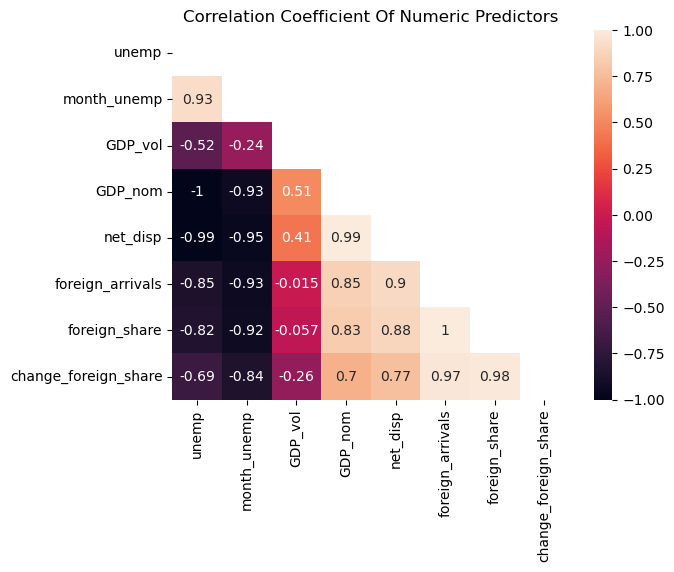

In [42]:
# correlation matrix heatmap

mask = np.triu(np.ones_like(df_small_num.corr(), dtype=bool))

sns.heatmap(df_small_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Numeric Predictors')
plt.show()

#### Interpretation/Remarks

GDP_vol appears to have minimal correlations between the numeric variables as well. Therefore, it seems appropriate to use GDP_vol as my indicator of economic condition. 
foreign_share has a lower correlation with GDP_vol compared to foreign_share. Therefore, it also seems more appropriate to use foreign_share as my indicator of foreign size of the population.

### 7.2. Descriptives
Now that the control variables are selected, descriptive statistics are found.

#### 7.2.1. Foreign share

In [43]:
# calculating the mean and standard deviation of "foreign_share" for each category of "inflow"
agg_foreign_share_by_inflow = df.groupby('inflow')['foreign_share'].agg(['mean', 'std'])

# print the mean and standard deviation
print(agg_foreign_share_by_inflow)

                mean       std
inflow                        
Syrians     2.316442  0.177714
Ukrainians  2.950000  0.000000


#### 7.2.2. GDP volume growth

In [44]:
# calculate the mean and standard deviation of "foreign_share" for each category of "inflow"
agg_GDP_vol_by_inflow = df.groupby('inflow')['GDP_vol'].agg(['mean', 'std'])

# print the resulting DataFrame with the mean and standard deviation
print(agg_GDP_vol_by_inflow)

               mean       std
inflow                       
Syrians     1.56487  0.432276
Ukrainians  1.77000  0.000000


## 8. Regression

### Model 1
This model only contains the dependent variable and main explanatory variable

In [45]:
# defining the variables

y = df['CLASS_POSITIVE']

X = df['inflow_Ukrainians']

# adding a constant

X = sm.add_constant(X)

In [46]:
# running regression

model1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.472207
         Iterations 5


In [47]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:         CLASS_POSITIVE   No. Observations:                18265
Model:                          Logit   Df Residuals:                    18263
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                0.001486
Time:                        14:29:59   Log-Likelihood:                -8624.9
converged:                       True   LL-Null:                       -8637.7
Covariance Type:            nonrobust   LLR p-value:                 4.059e-07
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4161      0.026    -53.925      0.000      -1.468      -1.365
inflow_Ukrainians    -0.1951      0.039     -5.058      0.000      -0.271      -0.119


In [48]:
# finding odds ratios

model1_odds = pd.DataFrame(np.exp(model1.params), columns=['OR'])
model1_odds['standard error'] = model1.bse
model1_odds['z-value'] = model1.params / model1.bse  # calculate z-values
model1_odds['p-value']=model1.pvalues
model1_odds[['2.5%', '97.5%']] = np.exp(model1.conf_int())

model1_odds

,OR,standard error,z-value,p-value,2.5%,97.5%
const,0.242661,0.026260,-53.925228,0.000000e+00,0.230487,0.255477
inflow_Ukrainians,0.822773,0.038565,-5.058368,4.228600e-07,0.762875,0.887373


### Model 2

This model contains the dependent variable and one control: foreign share

In [113]:
# defining the variables

y = df['CLASS_POSITIVE']

X = df['foreign_share']

# adding a constant

X = sm.add_constant(X)

In [114]:
# running regression

model2 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.472736
         Iterations 5


In [115]:
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:         CLASS_POSITIVE   No. Observations:                18265
Model:                          Logit   Df Residuals:                    18263
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:               0.0003675
Time:                        18:33:59   Log-Likelihood:                -8634.5
converged:                       True   LL-Null:                       -8637.7
Covariance Type:            nonrobust   LLR p-value:                   0.01175
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1383      0.148     -7.689      0.000      -1.428      -0.848
foreign_share    -0.1415      0.056     -2.524      0.012      -0.251      -0.032


In [116]:
# finding odds ratios

model2_odds = pd.DataFrame(np.exp(model2.params), columns=['OR'])
model2_odds['z-value'] = model2.params / model2.bse  # calculate z-values
model2_odds['p-value']=model2.pvalues
model2_odds[['2.5%', '97.5%']] = np.exp(model2.conf_int())

model2_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.320360,-7.688620,1.487303e-14,0.239672,0.428213
foreign_share,0.868096,-2.524014,1.160233e-02,0.777793,0.968884


### Model 3

This model contains the dependent variable and one control: GDP volume growth

In [109]:
# defining the variables

y = df['CLASS_POSITIVE']

X = df['GDP_vol']

# adding a constant

X = sm.add_constant(X)

In [110]:
# running regression

model3 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.471502
         Iterations 6


In [111]:
print(model3.summary())

                           Logit Regression Results                           
Dep. Variable:         CLASS_POSITIVE   No. Observations:                18265
Model:                          Logit   Df Residuals:                    18263
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                0.002977
Time:                        18:32:26   Log-Likelihood:                -8612.0
converged:                       True   LL-Null:                       -8637.7
Covariance Type:            nonrobust   LLR p-value:                 7.435e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8080      0.099     -8.170      0.000      -1.002      -0.614
GDP_vol       -0.4246      0.059     -7.170      0.000      -0.541      -0.309


In [112]:
# finding odds ratios

model3_odds = pd.DataFrame(np.exp(model3.params), columns=['OR'])
model3_odds['z-value'] = model3.params / model3.bse  # calculate z-values
model3_odds['p-value']=model3.pvalues
model3_odds[['2.5%', '97.5%']] = np.exp(model3.conf_int())

model3_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.445747,-8.169684,3.091992e-16,0.367200,0.541096
GDP_vol,0.654005,-7.169668,7.517988e-13,0.582326,0.734506


### Model 4
This model contains the dependent variable, main explanatory variable, and one control: foreign share of population

In [121]:
# defining the variables

y = df['CLASS_POSITIVE']

X2 = df[['inflow_Ukrainians', 'foreign_share']]

# adding a constant

X2 = sm.add_constant(X2)

In [122]:
# running regression

model4 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.471295
         Iterations 6


In [123]:
print(model4.summary())

                           Logit Regression Results                           
Dep. Variable:         CLASS_POSITIVE   No. Observations:                18265
Model:                          Logit   Df Residuals:                    18262
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                0.003413
Time:                        11:29:47   Log-Likelihood:                -8608.2
converged:                       True   LL-Null:                       -8637.7
Covariance Type:            nonrobust   LLR p-value:                 1.576e-13
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.4417      0.358     -9.619      0.000      -4.143      -2.740
inflow_Ukrainians    -0.7398      0.102     -7.258      0.000      -0.940      -0.540
foreign_share         0.

In [125]:
# finding odds ratios

model4_odds = pd.DataFrame(np.exp(model4.params), columns=['OR'])
model4_odds['z-value'] = model4.params / model4.bse  # calculate z-values
model4_odds['p-value']=model4.pvalues
model4_odds[['2.5%', '97.5%']] = np.exp(model4.conf_int())

model4_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.032010,-9.619214,6.633642e-22,0.015875,0.064541
inflow_Ukrainians,0.477198,-7.257645,3.938873e-13,0.390777,0.582730
foreign_share,2.390051,5.697066,1.218864e-08,1.771020,3.225452


In [108]:
###################
### the models below need their names changed!!! and might need to be re-arranged!
### e.g. Model 3 might need to be called Model 4, etc.

### Model 5
This model contains the dependent variable, main explanatory variable, and one control: GDP volume growth

In [117]:
# defining the variables

y = df['CLASS_POSITIVE']

X2 = df[['inflow_Ukrainians', 'GDP_vol']]

# adding a constant

X2 = sm.add_constant(X2)

In [118]:
# running regression

model5 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.471295
         Iterations 6


In [119]:
print(model5.summary())

                           Logit Regression Results                           
Dep. Variable:         CLASS_POSITIVE   No. Observations:                18265
Model:                          Logit   Df Residuals:                    18262
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                0.003413
Time:                        11:11:43   Log-Likelihood:                -8608.2
converged:                       True   LL-Null:                       -8637.7
Covariance Type:            nonrobust   LLR p-value:                 1.576e-13
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8628      0.099     -8.681      0.000      -1.058      -0.668
inflow_Ukrainians    -0.1143      0.042     -2.750      0.006      -0.196      -0.033
GDP_vol              -0.

In [120]:
# finding odds ratios

model5_odds = pd.DataFrame(np.exp(model5.params), columns=['OR'])
model5_odds['z-value'] = model5.params / model5.bse  # calculate z-values
model5_odds['p-value']=model5.pvalues
model5_odds[['2.5%', '97.5%']] = np.exp(model5.conf_int())

model5_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.421970,-8.681336,3.911465e-18,0.347282,0.512721
inflow_Ukrainians,0.891975,-2.749822,5.962766e-03,0.822178,0.967697
GDP_vol,0.698928,-5.697066,1.218864e-08,0.617892,0.790592


In [72]:
df.to_csv(CASS_thesis / "06_For-regression_limited_merged.csv")